# K-Distance Plot  
How to Choose EPS & min_samples

eps (Epsilon Radius)
What it Does: Defines the maximum distance between two points to consider them part of the same cluster.

How to Choose:

Start with a domain understanding. For example, if "Pages Viewed" and "Session Duration" are in similar ranges, eps=20 might make sense because it's proportional to the spread of the data.
Use a k-Distance Plot:
Sort the distances from each point to its k nearest neighbor (where k=min_samples).
Look for the "elbow" in the plot where the distances sharply increase. This is a good estimate for eps.

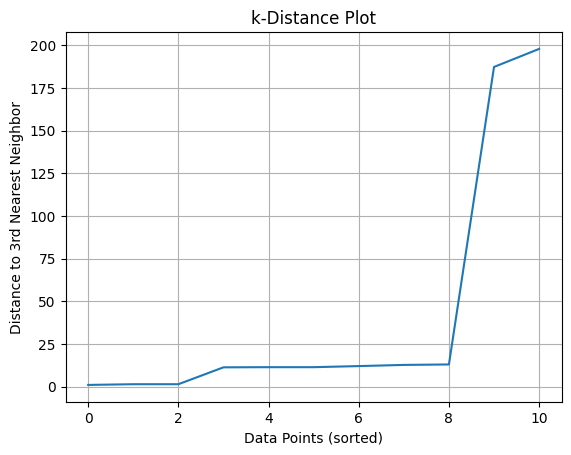

In [51]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data
user_data = pd.DataFrame({
    "Pages Viewed": [1, 2, 2, 10, 11, 50, 55, 60, 58, 200, 190],
    "Session Duration": [1, 1, 2, 10, 11, 50, 48, 60, 59, 200, 195]
})

# Compute the distances to the 3rd nearest neighbor (min_samples = 3)
neighbors = NearestNeighbors(n_neighbors=3)  # min_samples=3
neighbors_fit = neighbors.fit(user_data)
distances, indices = neighbors_fit.kneighbors(user_data)

# Sort the distances and plot
distances = np.sort(distances[:, 2])  # 2 because min_samples=3-1 (3rd nearest neighbor)
plt.plot(distances)
plt.title("k-Distance Plot")
plt.xlabel("Data Points (sorted)")
plt.ylabel("Distance to 3rd Nearest Neighbor")
plt.grid(True)
plt.show()


In [52]:
# Optional to find exact eps to use
from kneed import KneeLocator

# Compute distances to the 3rd nearest neighbor
neighbors = NearestNeighbors(n_neighbors=3)
neighbors_fit = neighbors.fit(user_data)
distances, indices = neighbors_fit.kneighbors(user_data)
distances = np.sort(distances[:, 2])  # 3rd nearest neighbor

# Find the elbow point
knee = KneeLocator(range(len(distances)), distances, curve="convex", direction="increasing")
print(f"Recommended eps (elbow): {distances[knee.knee]}")

Recommended eps (elbow): 13.0


min_samples (Minimum Points)  
  
What it Does: Sets the minimum number of points required to form a dense cluster.
How to Choose:
Rule of Thumb:
Set min_samples = dimensions + 1 (e.g., for 2D data, min_samples=3 is a good start).
Experimentation:
Start small (e.g., 3–5) and increase gradually to see how the clustering changes.

Summary: Tweaking Parameters  
Use a k-Distance Plot for eps to find a reasonable starting point.  
Begin with min_samples = dimensions + 1 and tweak it based on the dataset’s density.

# Practice Exercise: DBSCAN Clustering

## Scenario:
You’re analyzing online user activity logs. Each user session has two features:
1. **Pages Viewed**: The number of pages a user visited.
2. **Session Duration (minutes)**: How long the user stayed on the site.

You want to use DBSCAN to:
1. Identify dense groups of users based on their behavior.
2. Detect outliers (users with unusually long sessions or many pages viewed).

Apply DBSCAN to group users into clusters and detect outliers.
Add cluster labels to the DataFrame.
Visualize the clusters and outliers.
Experiment with different eps and min_samples values. What happens to the clusters and outliers?

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Load the data
user_data = pd.DataFrame({
    "Pages Viewed": [1, 2, 2, 10, 11, 50, 55, 60, 58, 200, 190],
    "Session Duration": [1, 1, 2, 10, 11, 50, 48, 60, 59, 200, 195]
})

user_data.head()

,Pages Viewed,Session Duration
0,1,1
1,2,1
2,2,2
3,10,10
4,11,11


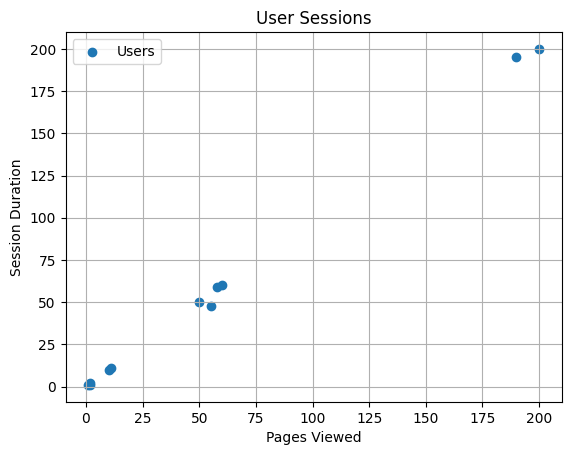

In [54]:
# Visualize the data
plt.scatter(user_data['Pages Viewed'], user_data['Session Duration'], label = 'Users')

plt.xlabel('Pages Viewed')
plt.ylabel('Session Duration')
plt.title('User Sessions')
plt.legend()
plt.grid()
plt.show()

In [55]:
# Apply DBSCAN
dbscan = DBSCAN(eps = 13, min_samples = 3)
user_data['Cluster'] = dbscan.fit_predict(user_data)

user_data

,Pages Viewed,Session Duration,Cluster
0,1,1,0
1,2,1,0
2,2,2,0
3,10,10,0
4,11,11,0
5,50,50,1
6,55,48,1
7,60,60,1
8,58,59,1
9,200,200,-1


In [56]:
# Identify noise vs clusters
noise = user_data[user_data['Cluster'] == -1]
clusters = user_data[user_data['Cluster'] != -1]

noise, clusters

(    Pages Viewed  Session Duration  Cluster
 9            200               200       -1
 10           190               195       -1,
    Pages Viewed  Session Duration  Cluster
 0             1                 1        0
 1             2                 1        0
 2             2                 2        0
 3            10                10        0
 4            11                11        0
 5            50                50        1
 6            55                48        1
 7            60                60        1
 8            58                59        1)

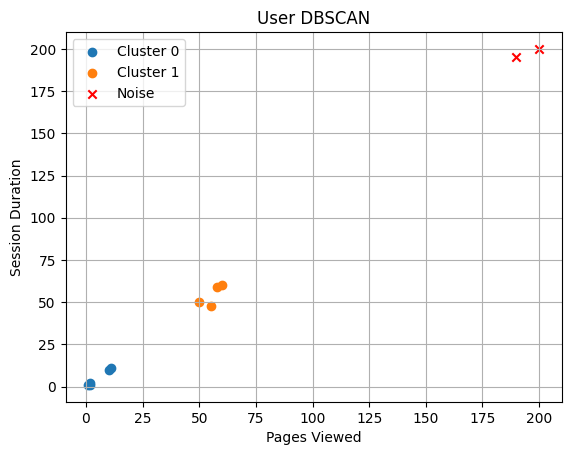

In [57]:
# Visualize the clusters
for cluster in user_data['Cluster'].unique():
    cluster_data = user_data[user_data['Cluster'] == cluster]
    label = 'Noise' if cluster == -1 else f'Cluster {cluster}'
    c = 'red' if cluster == -1 else None # Make the noise red and keep the clusters the default color\
    marker = 'x' if cluster == -1 else 'o' # Use an x marker for noise and a circle marker for clusters
    plt.scatter(cluster_data['Pages Viewed'], cluster_data['Session Duration'], label = label, c = c, marker = marker)

plt.xlabel('Pages Viewed')
plt.ylabel('Session Duration')
plt.title('User DBSCAN')
plt.legend()
plt.grid()
plt.show()

In [58]:
# Silhouette Score
from sklearn.metrics import silhouette_score

filtered_data = user_data[user_data['Cluster'] != -1]
score = silhouette_score(filtered_data[['Pages Viewed', 'Session Duration']], filtered_data['Cluster'])

print(f'Silhouette Score: {score}')

Silhouette Score: 0.8727093261731688


In [59]:
# Calinski-Harabasz Index
from sklearn.metrics import calinski_harabasz_score

filtered_data = user_data[user_data['Cluster'] != -1]
score = calinski_harabasz_score(filtered_data[['Pages Viewed', 'Session Duration']], filtered_data['Cluster'])

print(f'Calinski-Harabasz Index: {score}')

Calinski-Harabasz Index: 211.52094518761186
